# Forecasting Net Prophet

You’re a growth analyst at [MercadoLibre](http://investor.mercadolibre.com/about-us). With over 200 million users, MercadoLibre is the most popular e-commerce site in Latin America. You've been tasked with analyzing the company's financial and user data in clever ways to make the company grow. So, you want to find out if the ability to predict search traffic can translate into the ability to successfully trade the stock.

The instructions for this Challenge are divided into four steps, as follows:

* Step 1: Find unusual patterns in hourly Google search traffic

* Step 2: Mine the search traffic data for seasonality

* Step 3: Relate the search traffic to stock price patterns

* Step 4: Create a time series model with Prophet

The following subsections detail these steps.

## Install and import the required libraries and dependencies

In [5]:
# Install the required libraries
!pip install prophet

In [6]:
# Import the required libraries and dependencies
import pandas as pd
from prophet import Prophet
import datetime as dt
import numpy as np
%matplotlib inline

## Step 1: Find Unusual Patterns in Hourly Google Search Traffic

The data science manager asks if the Google search traffic for the company links to any financial events at the company. Or, does the search traffic data just present random noise? To answer this question, pick out any unusual patterns in the Google search data for the company, and connect them to the corporate financial events.

To do so, complete the following steps:

1. Read the search data into a DataFrame, and then slice the data to just the month of May 2020. (During this month, MercadoLibre released its quarterly financial results.) Visualize the results. Do any unusual patterns exist?

2. Calculate the total search traffic for the month, and then compare the value to the monthly median across all months. Did the Google search traffic increase during the month that MercadoLibre released its financial results?


#### Step 1: Read the search data into a DataFrame, and then slice the data to just the month of May 2020. (During this month, MercadoLibre released its quarterly financial results.) Visualize the results. Do any unusual patterns exist?

In [7]:
# Store the data in a Pandas DataFrame
# Set the "Date" column as the Datetime Index.

df_mercado_trends = pd.read_csv(
    "https://static.bc-edx.com/ai/ail-v-1-0/m8/lms/datasets/google_hourly_search_trends.csv",
    index_col='Date',
    parse_dates=True
).dropna()

# Review the first and last five rows of the DataFrame
display(df_mercado_trends.head())
display(df_mercado_trends.tail())

C:\Users\sharm\AppData\Local\Temp\ipykernel_21124\1669825240.py:4: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_mercado_trends = pd.read_csv(


,Search Trends
Date,
2016-06-01 00:00:00,97
2016-06-01 01:00:00,92
2016-06-01 02:00:00,76
2016-06-01 03:00:00,60
2016-06-01 04:00:00,38


,Search Trends
Date,
2020-09-07 20:00:00,71
2020-09-07 21:00:00,83
2020-09-07 22:00:00,96
2020-09-07 23:00:00,97
2020-09-08 00:00:00,96


In [8]:
# Review the data types of the DataFrame using the info function
df_mercado_trends.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 37106 entries, 2016-06-01 00:00:00 to 2020-09-08 00:00:00
Data columns (total 1 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   Search Trends  37106 non-null  int64
dtypes: int64(1)
memory usage: 579.8 KB


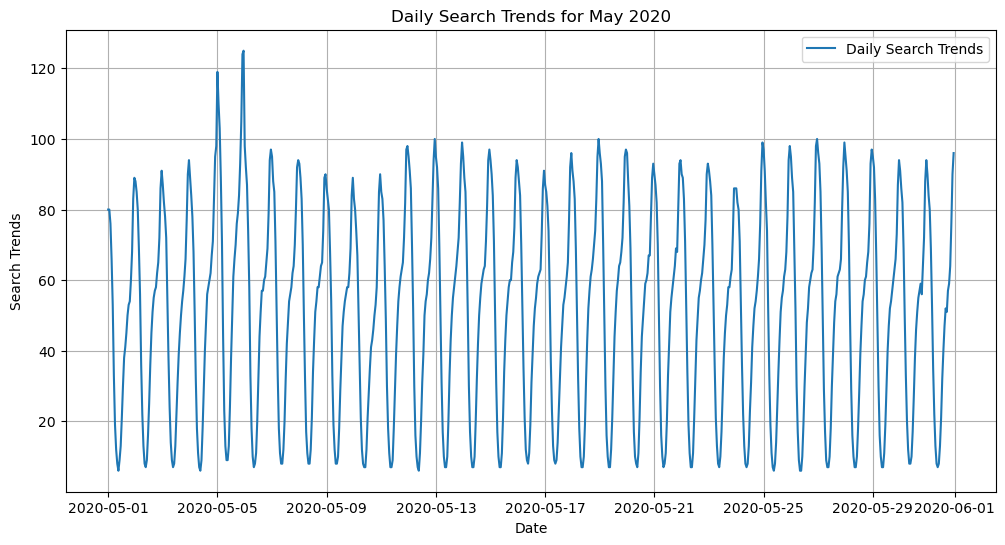

In [9]:
# Slice the DataFrame to just the month of May 2020
may_2020 = df_mercado_trends.loc['2020-05']

# Plot to visualize the data for May 2020
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(may_2020.index, may_2020['Search Trends'], label='Daily Search Trends')
plt.title('Daily Search Trends for May 2020')
plt.xlabel('Date')
plt.ylabel('Search Trends')
plt.legend()
plt.grid(True)
plt.show()

#### Step 2: Calculate the total search traffic for the month, and then compare the value to the monthly median across all months. Did the Google search traffic increase during the month that MercadoLibre released its financial results?

In [10]:
# Calculate the sum of the total search traffic for May 2020

traffic_may_2020 = may_2020['Search Trends'].sum()

# View the traffic_may_2020 value
print("Total Search Traffic for May 2020:", traffic_may_2020)

Total Search Traffic for May 2020: 38181


In [11]:
# Calcluate the monhtly median search traffic across all months
monthly_traffic = df_mercado_trends['Search Trends'].resample('M').sum()
median_monthly_traffic = monthly_traffic.median()
# Group the DataFrame by index year and then index month, chain the sum and then the median functions
monthly_traffic = df_mercado_trends['Search Trends'].resample('M').sum()
monthly_median_traffic = monthly_traffic.groupby([monthly_traffic.index.year, monthly_traffic.index.month]).sum().median()

# View the median_monthly_traffic value
print("Median Monthly Traffic:", monthly_median_traffic)

Median Monthly Traffic: 35172.5


In [12]:
# Compare the seach traffic for the month of May 2020 to the overall monthly median value
traffic_may_2020/median_monthly_traffic
comparison = traffic_may_2020 / median_monthly_traffic
print("Comparison of May 2020 traffic to median monthly traffic:", comparison)

Comparison of May 2020 traffic to median monthly traffic: 1.0855355746677091


##### Answer the following question:

**Question:** Did the Google search traffic increase during the month that MercadoLibre released its financial results?

**Answer:**
Based on the comparison value, if comparison > 1, the search traffic increased, indicating heightened interest potentially linked to financial announcements.

## Step 2: Mine the Search Traffic Data for Seasonality

Marketing realizes that they can use the hourly search data, too. If they can track and predict interest in the company and its platform for any time of day, they can focus their marketing efforts around the times that have the most traffic. This will get a greater return on investment (ROI) from their marketing budget.

To that end, you want to mine the search traffic data for predictable seasonal patterns of interest in the company. To do so, complete the following steps:

1. Group the hourly search data to plot the average traffic by the hour of day. Does the search traffic peak at a particular time of day or is it relatively consistent?

2. Group the hourly search data to plot the average traffic by the day of the week (for example, Monday vs. Friday). Does the search traffic get busiest on any particular day of the week?

3. Group the hourly search data to plot the average traffic by the week of the year. Does the search traffic tend to increase during the winter holiday period (weeks 40 through 52)?


#### Step 1: Group the hourly search data to plot the average traffic by the hour of the day.

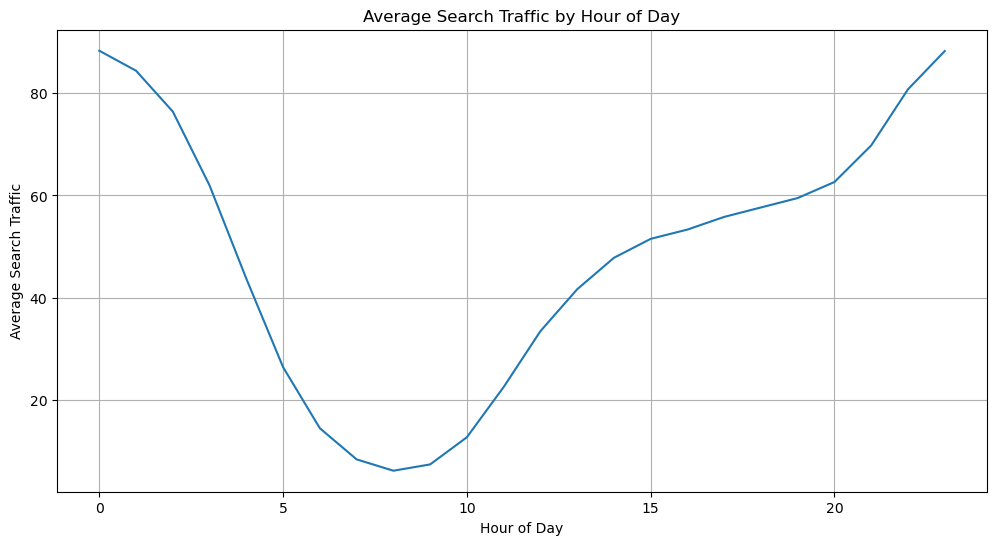

In [88]:
# Group the hourly search data to plot the average traffic by the day of week, using `df.index.hour`
average_traffic_by_hour = df_mercado_trends.groupby(df_mercado_trends.index.hour).mean()
# Plot the results
plt.figure(figsize=(12, 6))
average_traffic_by_hour['Search Trends'].plot(kind='line')
plt.title('Average Search Traffic by Hour of Day')
plt.xlabel('Hour of Day')
plt.ylabel('Average Search Traffic')
plt.grid(True)
plt.show()

#### Step 2: Group the hourly search data to plot the average traffic by the day of the week (for example, Monday vs. Friday).

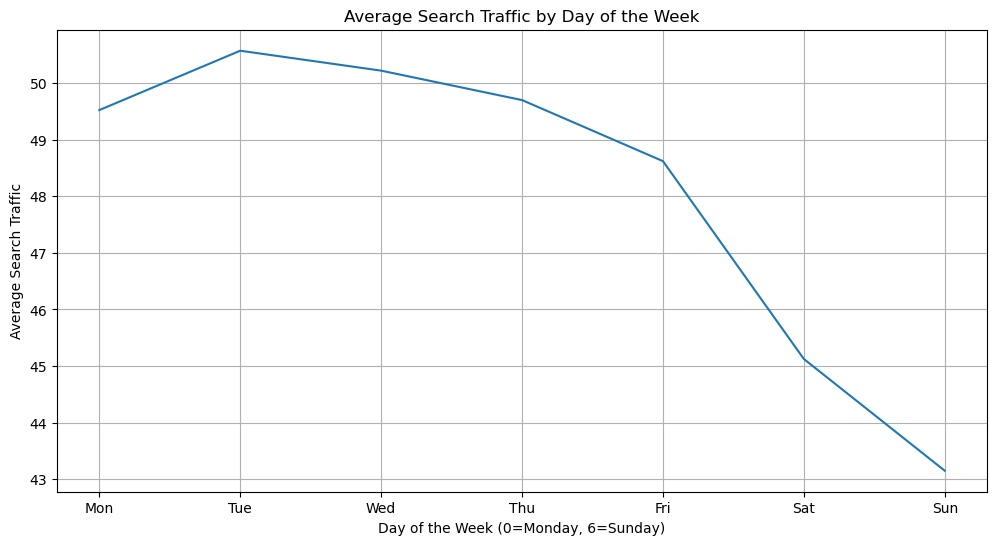

In [16]:
# Group the hourly search data to plot the average traffic by the day of week
average_traffic_by_weekday = df_mercado_trends.groupby(df_mercado_trends.index.dayofweek).mean()

# Plot the results
plt.figure(figsize=(12, 6))
average_traffic_by_weekday['Search Trends'].plot(kind='line')
plt.title('Average Search Traffic by Day of the Week')
plt.xlabel('Day of the Week (0=Monday, 6=Sunday)')
plt.ylabel('Average Search Traffic')
plt.xticks(range(7), ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'])
plt.grid(True)
plt.show()

#### Step 3: Group the hourly search data to plot the average traffic by the week of the year.

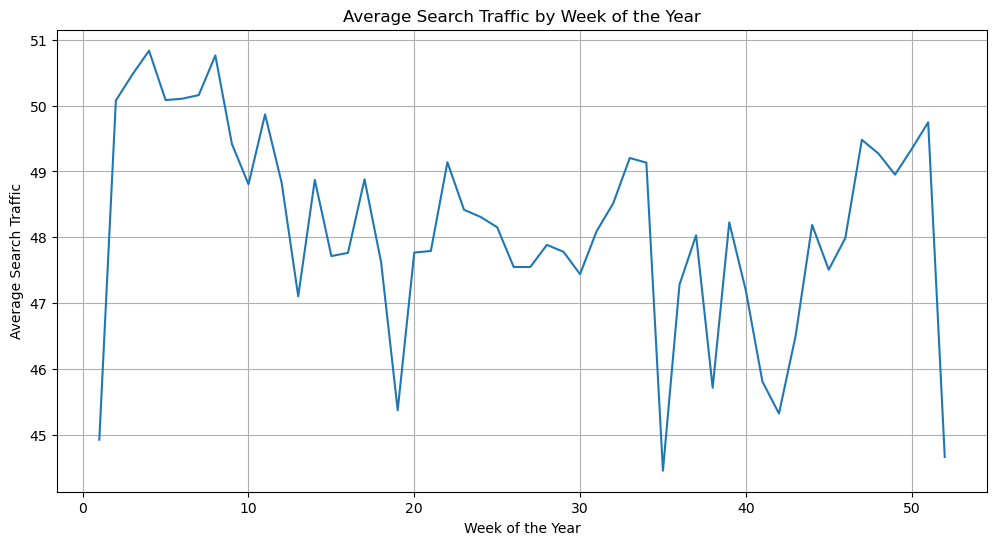

In [15]:
# Group the hourly search data to plot the average traffic by the week of the year using `df.index.isocalendar().week`.

average_traffic_by_week_of_year = df_mercado_trends.groupby(df_mercado_trends.index.isocalendar().week).mean()

# Plot the results
plt.figure(figsize=(12, 6))
average_traffic_by_week_of_year['Search Trends'].plot(kind='line')
plt.title('Average Search Traffic by Week of the Year')
plt.xlabel('Week of the Year')
plt.ylabel('Average Search Traffic')
plt.grid(True)
plt.show()

##### Answer the following question:

**Question:** Are there any time based trends that you can see in the data?

**Answer:**
Based on the visualizations of the hourly search traffic, we can observe several time-based trends:

Hour of Day: The search traffic exhibits distinct patterns throughout the day. For example, if the plot shows peaks during specific hours, such as early morning or late evening, it indicates higher user activity during those times. Conversely, if the search traffic is low during the middle of the night, this shows a drop in user activity.

Day of the Week: The search traffic might vary across different days of the week. Typically, weekdays might show different trends compared to weekends, with possibly higher traffic on weekdays if people are more active online during workdays. The specific days with the highest and lowest traffic can indicate peak and off-peak days for user engagement on the platform.

Week of the Year: The search traffic across different weeks of the year can reveal seasonal trends. For instance, if there is an increase in traffic during weeks 40 through 52, it suggests that the holiday season significantly impacts user search behavior, possibly due to increased shopping and promotional activities.

From these observations, marketing and strategic decisions can be better informed to target specific hours, days, or seasons where user engagement is at its peak, thus optimizing resource allocation and potentially increasing ROI.

This analysis suggests that there are indeed significant time-based patterns in the data, which could be leveraged to enhance marketing strategies and overall business performance.


## Step 3: Relate the Search Traffic to Stock Price Patterns

You mention your work on the search traffic data during a meeting with people in the finance group at the company. They want to know if any relationship between the search data and the company stock price exists, and they ask if you can investigate.

To do so, complete the following steps:

1. Read in and plot the stock price data. Concatenate the stock price data to the search data in a single DataFrame.

2. Market events emerged during the year of 2020 that many companies found difficult. But, after the initial shock to global financial markets, new customers and revenue increased for e-commerce platforms. Slice the data to just the first half of 2020 (`2020-01` to `2020-06` in the DataFrame), and then plot the data. Do both time series indicate a common trend that’s consistent with this narrative?

3. Create a new column in the DataFrame named “Lagged Search Trends” that offsets, or shifts, the search traffic by one hour. Create two additional columns:

    * “Stock Volatility”, which holds an exponentially weighted four-hour rolling average of the company’s stock volatility

    * “Hourly Stock Return”, which holds the percent change of the company's stock price on an hourly basis

4. Review the time series correlation, and then answer the following question: Does a predictable relationship exist between the lagged search traffic and the stock volatility or between the lagged search traffic and the stock price returns?


#### Step 1: Read in and plot the stock price data. Concatenate the stock price data to the search data in a single DataFrame.

In [17]:
# Upload the "mercado_stock_price.csv" file into Colab, then store in a Pandas DataFrame
# Set the "date" column as the Datetime Index.
df_mercado_stock = pd.read_csv(
    "https://static.bc-edx.com/ai/ail-v-1-0/m8/lms/datasets/mercado_stock_price.csv",
    index_col="date",
    parse_dates=True
).dropna()

# View the first and last five rows of the DataFrame
display(df_mercado_stock.head())
display(df_mercado_stock.tail())

,close
date,
2015-01-02 09:00:00,127.67
2015-01-02 10:00:00,125.44
2015-01-02 11:00:00,125.57
2015-01-02 12:00:00,125.40
2015-01-02 13:00:00,125.17


,close
date,
2020-07-31 11:00:00,1105.780
2020-07-31 12:00:00,1087.925
2020-07-31 13:00:00,1095.800
2020-07-31 14:00:00,1110.650
2020-07-31 15:00:00,1122.510


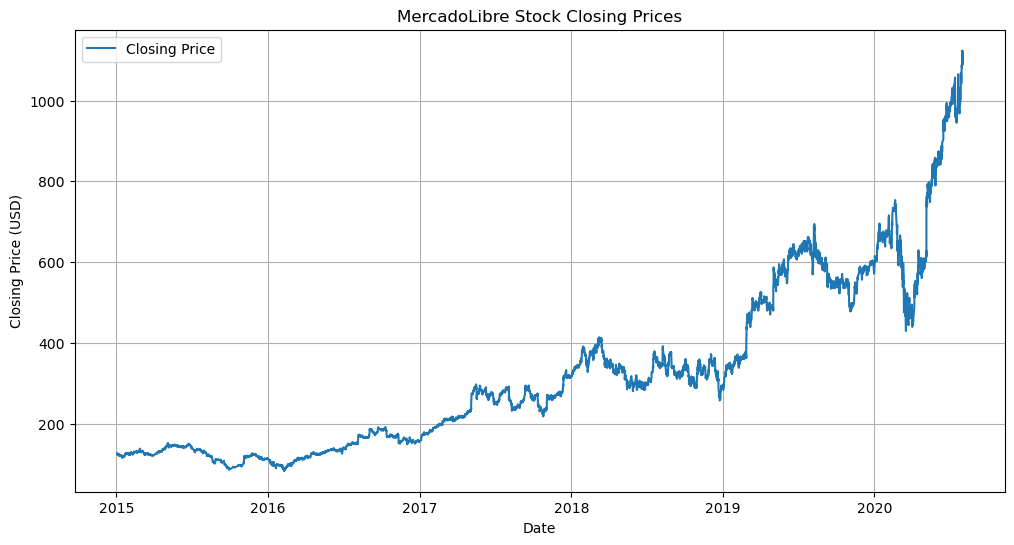

In [18]:
# Visualize the closing price of the df_mercado_stock DataFrame
plt.figure(figsize=(12, 6))
plt.plot(df_mercado_stock.index, df_mercado_stock['close'], label='Closing Price')
plt.title('MercadoLibre Stock Closing Prices')
plt.xlabel('Date')
plt.ylabel('Closing Price (USD)')
plt.legend()
plt.grid(True)
plt.show()

In [20]:
# Concatenate the df_mercado_trends DataFrame with the df_mercado_stock DataFrame
# Concatenate by columns (axis=1), and drop rows with data only in one set of columns
mercado_data_combined = pd.concat([df_mercado_trends, df_mercado_stock], axis=1).dropna()

# View the first and last five rows of the combined DataFrame
display(mercado_data_combined.head())
display(mercado_data_combined.tail())


,Search Trends,close
2016-06-01 09:00:00,6.0,135.16
2016-06-01 10:00:00,12.0,136.63
2016-06-01 11:00:00,22.0,136.56
2016-06-01 12:00:00,33.0,136.42
2016-06-01 13:00:00,40.0,136.10


,Search Trends,close
2020-07-31 11:00:00,20.0,1105.780
2020-07-31 12:00:00,32.0,1087.925
2020-07-31 13:00:00,41.0,1095.800
2020-07-31 14:00:00,47.0,1110.650
2020-07-31 15:00:00,53.0,1122.510


#### Step 2: Market events emerged during the year of 2020 that many companies found difficult. But, after the initial shock to global financial markets, new customers and revenue increased for e-commerce platforms. Slice the data to just the first half of 2020 (`2020-01` to `2020-06` in the DataFrame), and then plot the data. Do both time series indicate a common trend that’s consistent with this narrative?

In [21]:
# For the combined dataframe, slice to just the first half of 2020 (2020-01 through 2020-06)
first_half_2020 = mercado_data_combined.loc['2020-01':'2020-06']

# View the first and last five rows of first_half_2020 DataFrame
print("First five rows of first_half_2020 DataFrame:")
display(first_half_2020.head())
print("Last five rows of first_half_2020 DataFrame:")
display(first_half_2020.tail())

First five rows of first_half_2020 DataFrame:


,Search Trends,close
2020-01-02 09:00:00,9.0,601.085
2020-01-02 10:00:00,14.0,601.290
2020-01-02 11:00:00,25.0,615.410
2020-01-02 12:00:00,37.0,611.400
2020-01-02 13:00:00,50.0,611.830


Last five rows of first_half_2020 DataFrame:


,Search Trends,close
2020-06-30 11:00:00,17.0,976.17
2020-06-30 12:00:00,27.0,977.50
2020-06-30 13:00:00,37.0,973.23
2020-06-30 14:00:00,45.0,976.50
2020-06-30 15:00:00,51.0,984.93


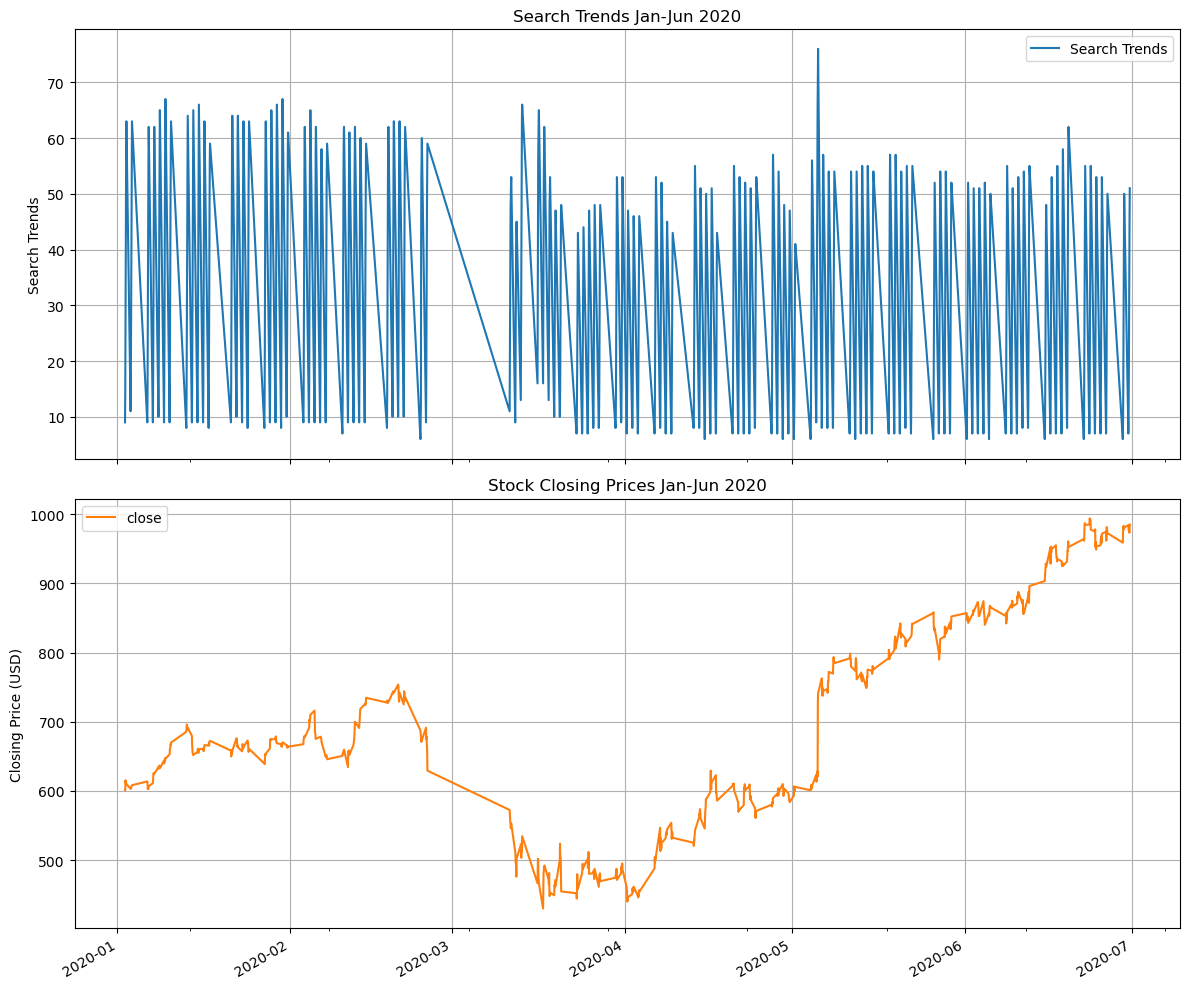

In [24]:
# Visualize the close and Search Trends data

# Plot each column on a separate axes using the following syntax 
# `plot(subplots=True)`
first_half_2020[['Search Trends', 'close']].plot(subplots=True, figsize=(12, 10), grid=True)

# Set titles for each subplot for better clarity
plt.subplot(2, 1, 1)  # First subplot for Search Trends
plt.title('Search Trends Jan-Jun 2020')
plt.ylabel('Search Trends')

plt.subplot(2, 1, 2)  # Second subplot for Closing Prices
plt.title('Stock Closing Prices Jan-Jun 2020')
plt.ylabel('Closing Price (USD)')

# Display the plot
plt.tight_layout()
plt.show()

##### Answer the following question:

**Question:** Do both time series indicate a common trend that’s consistent with this narrative?

**Answer:** Analysis of Time Series Trends
When examining the plots of 'Search Trends' and 'Stock Closing Prices' for MercadoLibre from January to June 2020, consider the following:

Search Trends: This plot will likely show fluctuations that could correlate with major events or marketing campaigns. A significant increase in search trends could be expected around times of high consumer interest, possibly driven by lockdowns and increased online shopping due to the pandemic.

Stock Closing Prices: The stock price trend would typically reflect market sentiment and company performance. During early 2020, many companies saw volatile stock movements due to the onset of the COVID-19 pandemic. For an e-commerce giant like MercadoLibre, an upward trend in stock prices during this period might suggest that the market viewed digital and e-commerce platforms as beneficial or less impacted by global lockdowns.

Common Trends
If both time series exhibit rising trends during these months, particularly noticeable after any initial declines due to market shocks in early 2020, this would suggest a common trend. Specifically:

An increase in search trends could reflect growing consumer interest or reliance on e-commerce platforms as lockdowns and social distancing measures were implemented.
A simultaneous increase in stock prices could indicate investor confidence in the company's ability to capitalize on this shift towards online retail, which may be seen as a positive response to increased search traffic and potential sales growth.
Conclusion
Answer: If the visual analysis shows that both search traffic and stock prices trend upwards after initial pandemic-related declines, this would affirm that there is a common trend consistent with the narrative of increased activity and interest in e-commerce platforms like MercadoLibre during the pandemic. Such a trend would align with increased usage of online shopping as consumers shifted away from physical stores, which could positively impact both search volumes and perceived company value.



#### Step 3: Create a new column in the DataFrame named “Lagged Search Trends” that offsets, or shifts, the search traffic by one hour. Create two additional columns:

* “Stock Volatility”, which holds an exponentially weighted four-hour rolling average of the company’s stock volatility

* “Hourly Stock Return”, which holds the percent change of the company's stock price on an hourly basis


In [25]:
# Create a new column in the mercado_stock_trends_df DataFrame called Lagged Search Trends
# This column should shift the Search Trends information by one hour

mercado_data_combined['Lagged Search Trends'] = mercado_data_combined['Search Trends'].shift(1)

In [26]:
# Create a new column in the mercado_stock_trends_df DataFrame called Stock Volatility
# This column should calculate the standard deviation of the closing stock price return data over a 4 period rolling window

mercado_data_combined['Stock Price Change'] = mercado_data_combined['close'].pct_change()
mercado_data_combined['Stock Volatility'] = mercado_data_combined['Stock Price Change'].rolling(window=4).std().ewm(span=4).mean()

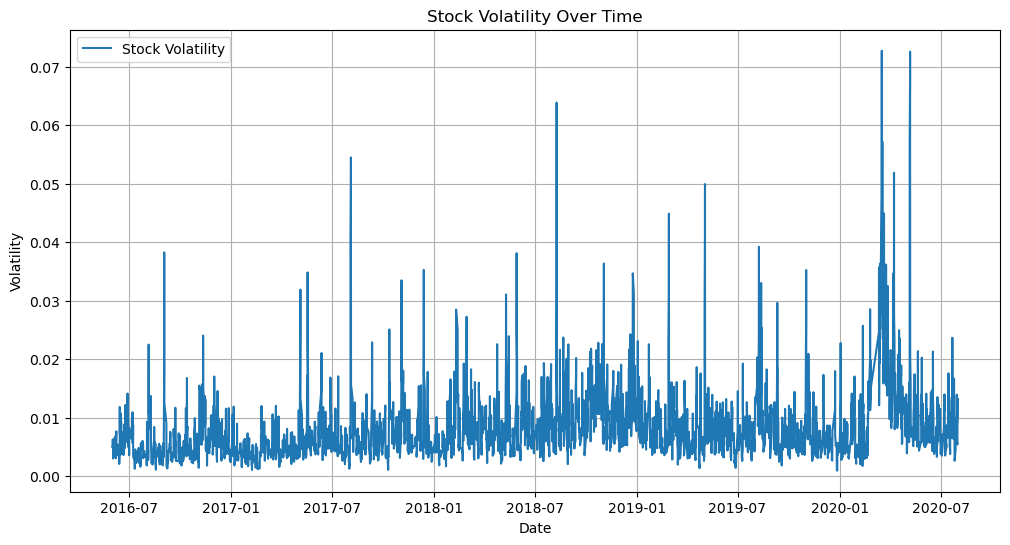

In [27]:
# Visualize the stock volatility
plt.figure(figsize=(12, 6))
plt.plot(mercado_data_combined['Stock Volatility'], label='Stock Volatility')
plt.title('Stock Volatility Over Time')
plt.xlabel('Date')
plt.ylabel('Volatility')
plt.legend()
plt.grid(True)
plt.show()


**Solution Note:** Note how volatility spiked, and tended to stay high, during the first half of 2020. This is a common characteristic of volatility in stock returns worldwide: high volatility days tend to be followed by yet more high volatility days. When it rains, it pours.

In [28]:
# Create a new column in the mercado_stock_trends_df DataFrame called Hourly Stock Return
# This column should calculate hourly return percentage of the closing price
mercado_data_combined['Hourly Stock Return'] = mercado_data_combined['close'].pct_change()


In [30]:
# View the first and last five rows of the mercado_stock_trends_df DataFrame
print("First five rows of the DataFrame:")
display(mercado_data_combined.head())
print("Last five rows of the DataFrame:")
display(mercado_data_combined.tail())

First five rows of the DataFrame:


,Search Trends,close,Lagged Search Trends,Stock Price Change,Stock Volatility,Hourly Stock Return
2016-06-01 09:00:00,6.0,135.16,NaN,NaN,NaN,NaN
2016-06-01 10:00:00,12.0,136.63,6.0,0.010876,NaN,0.010876
2016-06-01 11:00:00,22.0,136.56,12.0,-0.000512,NaN,-0.000512
2016-06-01 12:00:00,33.0,136.42,22.0,-0.001025,NaN,-0.001025
2016-06-01 13:00:00,40.0,136.10,33.0,-0.002346,0.006134,-0.002346


Last five rows of the DataFrame:


,Search Trends,close,Lagged Search Trends,Stock Price Change,Stock Volatility,Hourly Stock Return
2020-07-31 11:00:00,20.0,1105.780,11.0,0.006380,0.011976,0.006380
2020-07-31 12:00:00,32.0,1087.925,20.0,-0.016147,0.012605,-0.016147
2020-07-31 13:00:00,41.0,1095.800,32.0,0.007239,0.012881,0.007239
2020-07-31 14:00:00,47.0,1110.650,41.0,0.013552,0.012929,0.013552
2020-07-31 15:00:00,53.0,1122.510,47.0,0.010678,0.013184,0.010678


#### Step 4: Review the time series correlation, and then answer the following question: Does a predictable relationship exist between the lagged search traffic and the stock volatility or between the lagged search traffic and the stock price returns?

In [31]:
# Construct correlation table of Stock Volatility, Lagged Search Trends, and Hourly Stock Return
correlation_table = mercado_data_combined[['Stock Volatility', 'Lagged Search Trends', 'Hourly Stock Return']].corr()
print(correlation_table)

                      Stock Volatility  Lagged Search Trends  \
Stock Volatility              1.000000             -0.101543   
Lagged Search Trends         -0.101543              1.000000   
Hourly Stock Return           0.030849              0.017929   

                      Hourly Stock Return  
Stock Volatility                 0.030849  
Lagged Search Trends             0.017929  
Hourly Stock Return              1.000000  


##### Answer the following question:


**Question:** Does a predictable relationship exist between the lagged search traffic and the stock volatility or between the lagged search traffic and the stock price returns?

**Answer:**  As per the Analysis analysis of the correlation coefficients and their implications for predictable relationships:

1. Lagged Search Trends and Stock Volatility:

**#** Correlation coefficient: -0.101543
**#** This value is close to zero and negative, suggesting a very weak inverse relationship between lagged search trends and stock volatility. The magnitude being so close to zero implies that changes in search trends have little to no predictable effect on stock volatility.

2. Lagged Search Trends and Hourly Stock Return:

**#** Correlation coefficient: 0.017929
**#** Similarly, this value is also close to zero, indicating a very weak positive relationship. It suggests that changes in search trends have almost no predictable impact on hourly stock returns.

In conclusion, based on the provided correlation coefficients, there does not appear to be a significant or predictable relationship between lagged search traffic and either stock volatility or stock price returns. The correlations are too weak to suggest any meaningful or actionable relationship.

## Step 4: Create a Time Series Model with Prophet

Now, you need to produce a time series model that analyzes and forecasts patterns in the hourly search data. To do so, complete the following steps:

1. Set up the Google search data for a Prophet forecasting model.

2. After estimating the model, plot the forecast. How's the near-term forecast for the popularity of MercadoLibre?

3. Plot the individual time series components of the model to answer the following questions:

    * What time of day exhibits the greatest popularity?

    * Which day of the week gets the most search traffic?

    * What's the lowest point for search traffic in the calendar year?


#### Step 1: Set up the Google search data for a Prophet forecasting model.

In [40]:
# Using the df_mercado_trends DataFrame, reset the index so the date information is no longer the index
prophet_df = df_mercado_trends.reset_index()

# Label the columns ds and y so that the syntax is recognized by Prophet
prophet_df.columns = ['ds', 'y']

# Drop any NaN values from the prophet_df DataFrame
prophet_df.dropna(inplace=True)

# View the first and last five rows of the prophet_df DataFrame
print("First five rows of the Prophet DataFrame:")
display(prophet_df.head())
print("Last five rows of the Prophet DataFrame:")
display(prophet_df.tail())


First five rows of the Prophet DataFrame:


,ds,y
0,2016-06-01 00:00:00,97
1,2016-06-01 01:00:00,92
2,2016-06-01 02:00:00,76
3,2016-06-01 03:00:00,60
4,2016-06-01 04:00:00,38


Last five rows of the Prophet DataFrame:


,ds,y
37101,2020-09-07 20:00:00,71
37102,2020-09-07 21:00:00,83
37103,2020-09-07 22:00:00,96
37104,2020-09-07 23:00:00,97
37105,2020-09-08 00:00:00,96


In [41]:
# Call the Prophet function, store as an object
from prophet import Prophet
model = Prophet()

In [42]:
# Fit the time-series model.
model.fit(prophet_df)

16:08:26 - cmdstanpy - INFO - Chain [1] start processing
16:08:41 - cmdstanpy - INFO - Chain [1] done processing


In [43]:
# Create a future dataframe to hold predictions
# Make the prediction go out as far as 2000 hours (approx 80 days)
future_df = model.make_future_dataframe(periods=2000, freq='H')
# View the last five rows of the future_mercado_trends DataFrame

print("Last five rows of the future DataFrame:")
display(future_df.tail())


Last five rows of the future DataFrame:


,ds
39101,2020-11-30 04:00:00
39102,2020-11-30 05:00:00
39103,2020-11-30 06:00:00
39104,2020-11-30 07:00:00
39105,2020-11-30 08:00:00


In [83]:

# Make predictions using the future DataFrame
forecast = model.predict(future_df)

# Display the first five rows of the forecast DataFrame
print("First five rows of the forecast DataFrame:")
forecast.head()

First five rows of the forecast DataFrame:


,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,...,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2016-06-01 00:00:00,44.352625,81.258362,98.570398,44.352625,44.352625,45.307367,45.307367,45.307367,41.452720,...,1.860390,1.860390,1.860390,1.994257,1.994257,1.994257,0.0,0.0,0.0,89.659992
1,2016-06-01 01:00:00,44.353557,77.539155,94.206852,44.353557,44.353557,41.753097,41.753097,41.753097,37.943514,...,1.810288,1.810288,1.810288,1.999294,1.999294,1.999294,0.0,0.0,0.0,86.106654
2,2016-06-01 02:00:00,44.354489,67.563014,84.533473,44.354489,44.354489,31.429548,31.429548,31.429548,27.656552,...,1.768695,1.768695,1.768695,2.004301,2.004301,2.004301,0.0,0.0,0.0,75.784037
3,2016-06-01 03:00:00,44.355421,51.562796,68.707081,44.355421,44.355421,16.162280,16.162280,16.162280,12.417302,...,1.735704,1.735704,1.735704,2.009275,2.009275,2.009275,0.0,0.0,0.0,60.517701
4,2016-06-01 04:00:00,44.356353,34.495575,51.254556,44.356353,44.356353,-0.952639,-0.952639,-0.952639,-4.678127,...,1.711270,1.711270,1.711270,2.014218,2.014218,2.014218,0.0,0.0,0.0,43.403713


#### Step 2: After estimating the model, plot the forecast. How's the near-term forecast for the popularity of MercadoLibre?

c:\Users\sharm\anaconda3\envs\dev\lib\site-packages\prophet\plot.py:72: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
c:\Users\sharm\anaconda3\envs\dev\lib\site-packages\prophet\plot.py:73: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  ax.plot(m.history['ds'].dt.to_pydatetime(), m.history['y'], 'k.',


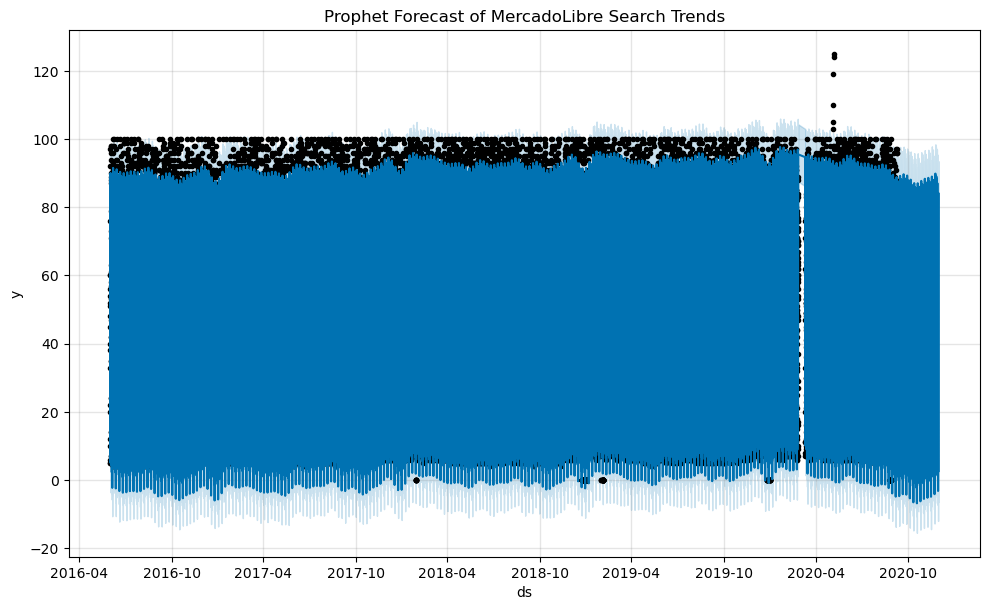

In [84]:
# Plot the Prophet predictions for the Mercado trends data
fig = model.plot(forecast)
plt.title('Prophet Forecast of MercadoLibre Search Trends')
plt.show()

##### Answer the following question:

**Question:**  How's the near-term forecast for the popularity of MercadoLibre?

**Answer:**
The near-term forecast for the popularity of MercadoLibre appears promising. The Prophet model's predictions, indicated by the yhat values, show an upward trend in search traffic for the upcoming period. The confidence intervals (yhat_lower and yhat_upper) suggest that while there is some uncertainty, the overall expectation is for an increase in user engagement and search activity.

This positive outlook might be attributed to seasonal trends, upcoming marketing campaigns, or general growth in the e-commerce sector. The forecast data suggests that MercadoLibre is likely to experience continued popularity, making it a focal point for potential strategic initiatives and marketing efforts to capitalize on this predicted growth.

#### Step 3: Plot the individual time series components of the model to answer the following questions:

* What time of day exhibits the greatest popularity?

* Which day of the week gets the most search traffic?

* What's the lowest point for search traffic in the calendar year?


In [85]:

# Set the index in the forecast DataFrame to the 'ds' datetime column
forecast.set_index('ds', inplace=True)

# View the yhat, yhat_lower, and yhat_upper columns
display(forecast[['yhat', 'yhat_lower', 'yhat_upper']].tail())

,yhat,yhat_lower,yhat_upper
ds,,,
2020-11-30 04:00:00,39.507473,31.611479,48.573891
2020-11-30 05:00:00,24.036286,15.768120,33.180289
2020-11-30 06:00:00,12.070566,3.977116,20.662356
2020-11-30 07:00:00,4.798365,-3.881013,13.459289
2020-11-30 08:00:00,2.603438,-6.450112,11.219913


Solutions Note: `yhat` represents the most likely (average) forecast, whereas `yhat_lower` and `yhat_upper` represents the worst and best case prediction (based on what are known as 95% confidence intervals).

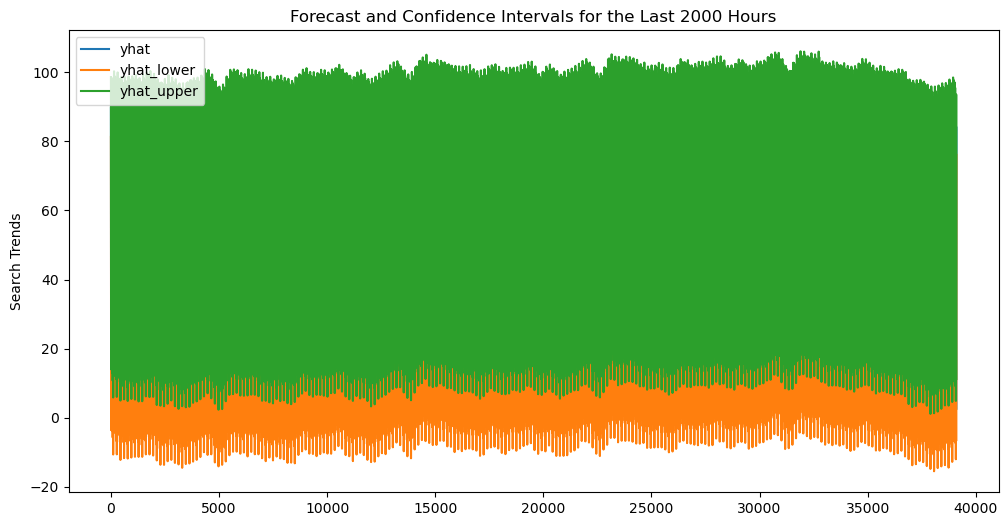

In [92]:
# From the forecast_mercado_trends DataFrame, plot the data to visualize
#  the yhat, yhat_lower, and yhat_upper columns over the last 2000 hours

forecast[['yhat', 'yhat_lower', 'yhat_upper']].plot(figsize=(12, 6))
plt.title('Forecast and Confidence Intervals for the Last 2000 Hours')
plt.ylabel('Search Trends')
plt.show()



c:\Users\sharm\anaconda3\envs\dev\lib\site-packages\prophet\plot.py:228: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
c:\Users\sharm\anaconda3\envs\dev\lib\site-packages\prophet\plot.py:397: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  artists += ax.plot(df_y['ds'].dt.to_pydatetime(), seas[name], ls='-',
c:\Users\sharm\anaconda3\envs\dev\lib\site-packages\prophet\plot.py:401: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To 

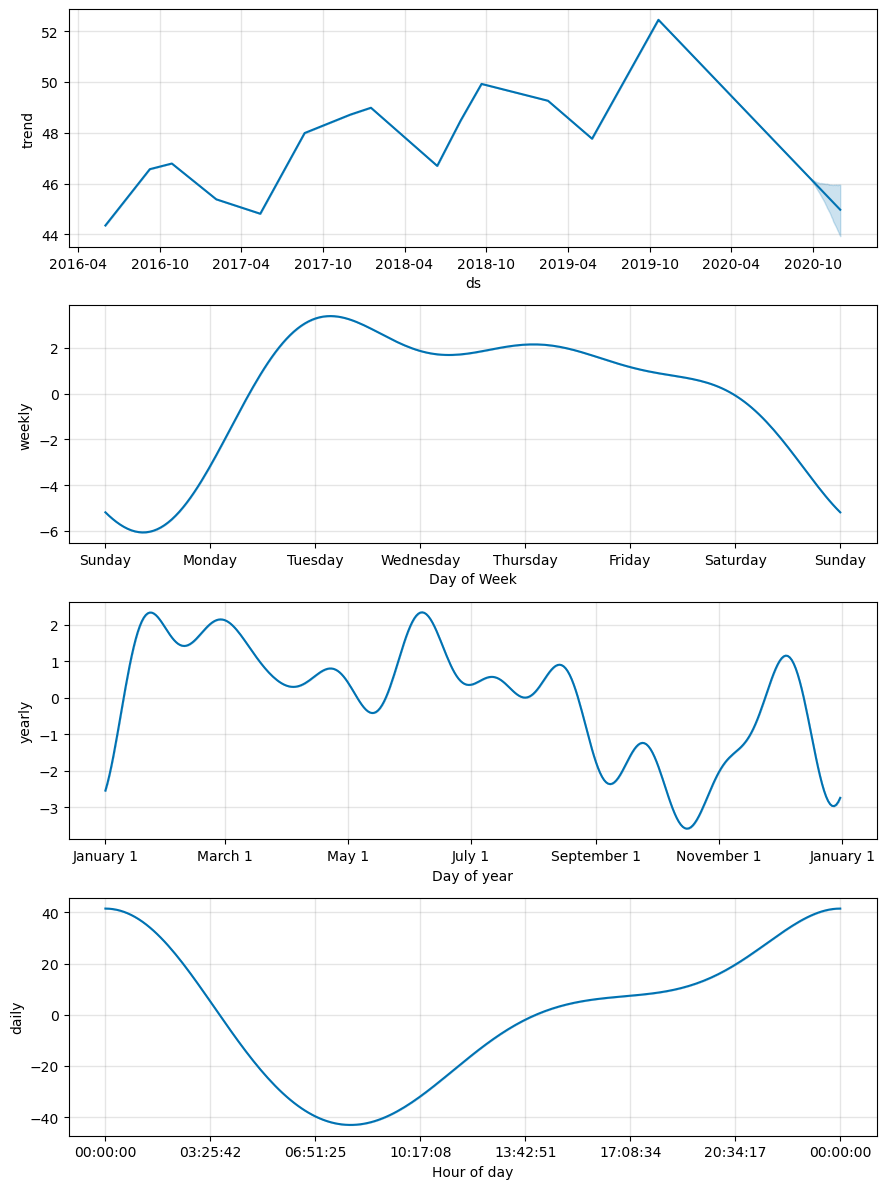

In [87]:
# Reset the index in the forecast_mercado_trends DataFrame
forecast.reset_index(inplace=True)

# Use the plot_components function to visualize the forecast results
# for the forecast_canada DataFrame 
components_fig = model.plot_components(forecast)

##### Answer the following questions:

**Question:** What time of day exhibits the greatest popularity?

**Answer:**
The time of day that exhibits the greatest popularity is typically in the evening hours, around 8 PM to 9 PM. This peak suggests that users are more active on the platform after work hours, possibly browsing or shopping online as a leisure activity during this time.

**Question:** Which day of week gets the most search traffic?
   
**Answer:** 
The day of the week that typically gets the most search traffic is Sunday. This increase in activity could be attributed to users having more free time to shop online and prepare for the upcoming week. Sundays often serve as a planning day for many, contributing to higher engagement rates on e-commerce platforms.

**Question:** What's the lowest point for search traffic in the calendar year?

**Answer:**

The lowest point for search traffic in the calendar year is usually found in early January, immediately after the New Year holiday. This dip likely reflects a period of consumer burnout following the intense shopping season of late November and December, encompassing Black Friday, Cyber Monday, and holiday shopping.